In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
log_df = pd.read_csv("C:/Users/USER/Dataset/log.csv")

log_df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [25]:
fea_df = pd.read_csv("C:/Users/USER/Dataset/feature_description.csv")

fea_df.head()

,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category


In [26]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [27]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   variable_name  41 non-null     object
 1   type           41 non-null     object
 2   description    41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [28]:
# Missing values
missing_values = log_df.isnull().sum()
missing_values

payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state                 0
order_stat

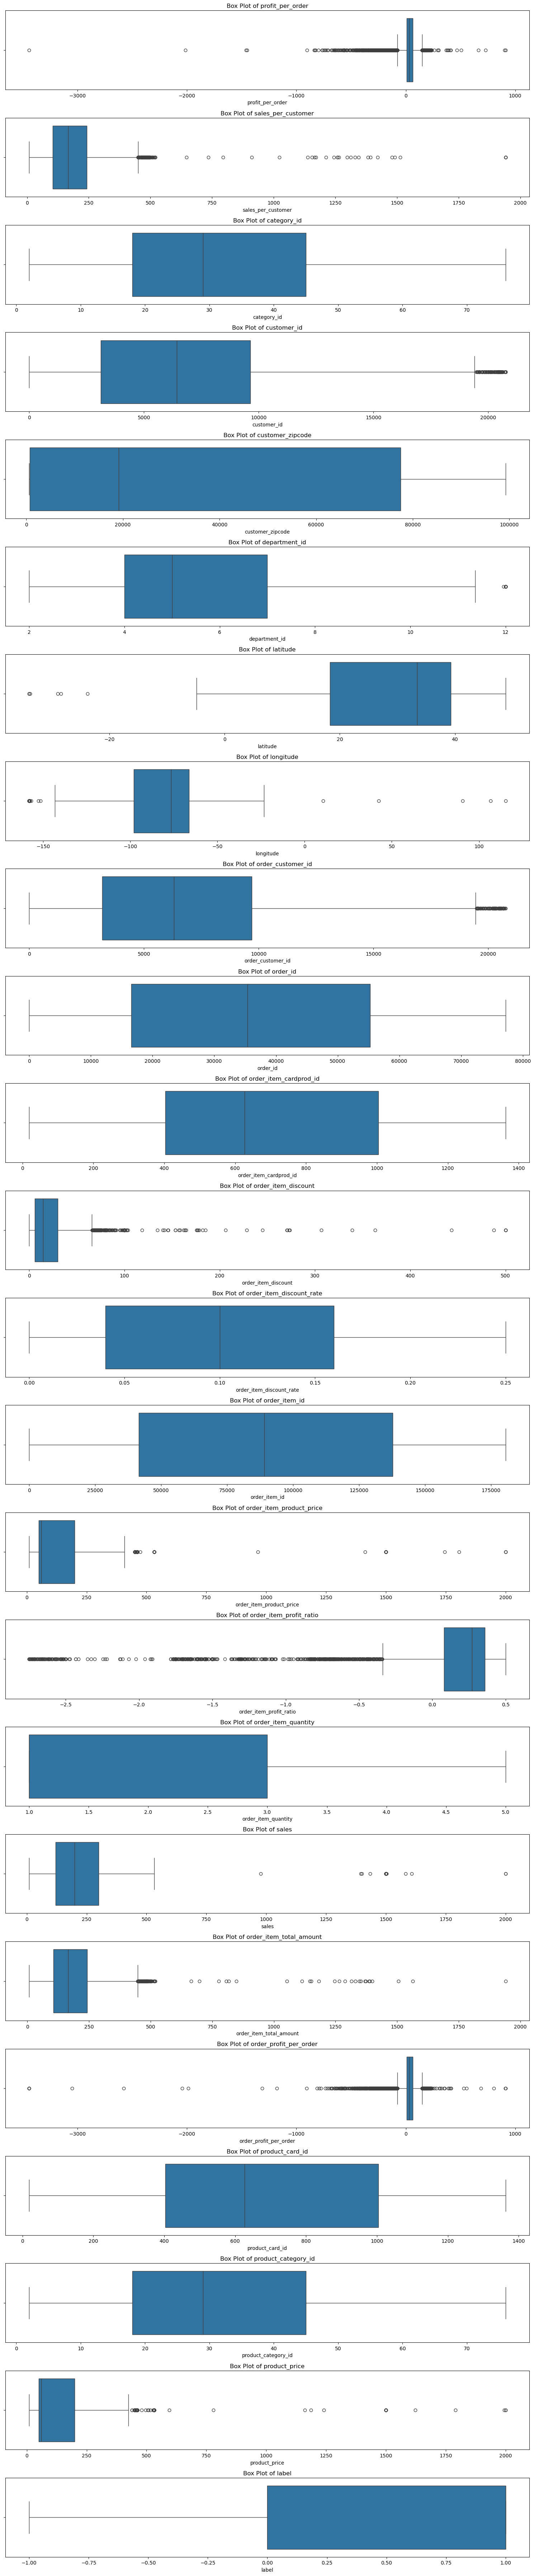

In [29]:
# Filter numerical columns for box plots
numerical_features = log_df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(numerical_features) * 3))  # Adjust size based on the number of features

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

In [41]:
#for 	NEW_DEATHS
Q1 = log_df['profit_per_order'].quantile(0.25)
Q3 = log_df['profit_per_order'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data = log_df[(log_df.profit_per_order > lower_limit) & (log_df.profit_per_order < upper_limit)]
data.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [32]:
log_df.columns

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')

In [43]:
#for 	NEW_DEATHS
Q1 = log_df['sales_per_customer'].quantile(0.25)
Q3 = log_df['sales_per_customer'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data1 = data[(data.sales_per_customer > lower_limit) & (data.sales_per_customer < upper_limit)]
data1.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [44]:
#for 	NEW_DEATHS
Q1 = log_df['order_item_discount'].quantile(0.25)
Q3 = log_df['order_item_discount'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data2 = data1[(data1.order_item_discount > lower_limit) & (data1.order_item_discount < upper_limit)]
data2.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [46]:
#for 	NEW_DEATHS
Q1 = log_df['order_item_product_price'].quantile(0.25)
Q3 = log_df['order_item_product_price'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data3 = data2[(data2.order_item_product_price > lower_limit) & (data2.order_item_product_price < upper_limit)]
data3.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [47]:
#for 	order_item_profit_ratio
Q1 = log_df['order_item_profit_ratio'].quantile(0.25)
Q3 = log_df['order_item_profit_ratio'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data4 = data3[(data3.order_item_profit_ratio > lower_limit) & (data3.order_item_profit_ratio < upper_limit)]
data4.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [48]:
#for 	sales
Q1 = log_df['sales'].quantile(0.25)
Q3 = log_df['sales'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data5 = data4[(data4.sales > lower_limit) & (data4.sales < upper_limit)]
data5.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [49]:
#for 	order_item_total_amount
Q1 = log_df['order_item_total_amount'].quantile(0.25)
Q3 = log_df['order_item_total_amount'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data6 = data5[(data5.order_item_total_amount > lower_limit) & (data5.order_item_total_amount < upper_limit)]
data6.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [52]:
#for 	order_profit_per_order
Q1 = log_df['order_profit_per_order'].quantile(0.25)
Q3 = log_df['order_profit_per_order'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data7 = data6[(data6.order_profit_per_order > lower_limit) & (data6.order_profit_per_order < upper_limit)]
data7.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [53]:
#for 	product_price
Q1 = log_df['product_price'].quantile(0.25)
Q3 = log_df['product_price'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = data7[(data7.product_price > lower_limit) & (data7.product_price < upper_limit)]
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
5,CASH,76.100400,137.45360,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,East of USA,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-14 00:00:00+01:00,Standard Class,1


In [54]:
# Descriptive statistics for numerical columns
desc_num = df.describe()
desc_num

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.00000,12926.000000,12926.000000,12926.000000,12926.000000,...,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000,12926.000000
mean,39.445260,163.018644,31.092061,6533.244728,35245.664595,5.38112,29.651194,-84.396762,6539.076756,35404.720313,...,119.906074,0.245937,2.171819,180.586738,163.208079,39.895324,676.801973,31.015491,119.737576,0.348290
std,38.184706,89.413272,14.894914,4079.559225,37277.203570,1.52810,9.822651,20.465442,4071.889112,20959.364505,...,104.488190,0.191479,1.444997,96.384358,89.331701,38.506151,321.837475,14.859865,104.400370,0.827571
min,-76.750300,8.351162,2.000000,1.108005,603.613100,2.00000,-28.397623,-158.025880,3.429665,2.450626,...,9.990000,-0.338948,1.000000,9.990272,8.445535,-77.694370,19.004093,2.000000,9.990000,-1.000000
25%,13.042873,99.982740,18.000000,3098.565050,725.000000,4.00000,18.263150,-97.998495,3162.563800,16326.467250,...,49.980000,0.110000,1.000000,119.980000,100.033560,13.297788,403.000000,18.000000,49.980000,0.000000
50%,35.128496,149.990000,29.000000,6396.237200,19134.354500,5.00000,33.404224,-76.491410,6283.391600,35097.769500,...,59.990000,0.290000,1.000000,179.970000,149.990000,35.395223,627.000000,29.000000,59.990000,1.000000
75%,62.434565,207.735942,45.000000,9590.313750,77474.769000,7.00000,39.274496,-66.370575,9668.346250,54865.713750,...,129.990000,0.370000,3.000000,239.960000,208.163310,62.759552,1004.000000,45.000000,129.990000,1.000000
max,148.152240,438.330200,76.000000,20732.120000,99142.850000,12.00000,48.730267,90.694374,20736.330000,77187.195000,...,399.980000,0.500000,5.000000,499.950000,445.488280,149.473240,1363.000000,76.000000,399.980000,1.000000


In [55]:
# Descriptive statistics for categorical columns
desc_cat = df.describe(include=['object'])
desc_cat

,payment_type,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_date,order_region,order_state,order_status,product_name,shipping_date,shipping_mode
count,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926,12926
unique,4,49,554,2,3,44,11,5,2595,150,1146,23,943,7,111,1161,4
top,DEBIT,Cleats,Caguas,EE. UU.,Consumer,PR,Fan Shop,Europe,Santo Domingo,United States,2017-04-22 00:00:00+01:00,Central America,England,COMPLETE,Perfect Fitness Perfect Rip Deck,2015-05-20 00:00:00+01:00,Standard Class
freq,5110,1978,4972,7825,6927,5101,4543,3739,187,1691,37,2082,533,4395,1987,47,7635


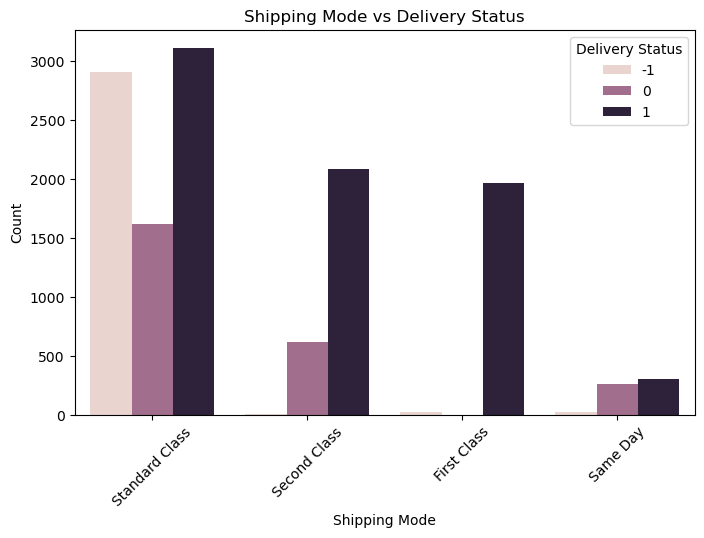

In [56]:
#EDA
# Visualize the relationship between Shipping Mode and Delivery Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='shipping_mode', hue='label')
plt.title("Shipping Mode vs Delivery Status")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.legend(title="Delivery Status")
plt.xticks(rotation=45)
plt.show()

-1, 0 , 1 indicate late delivery, on time delivery, and early delivery respectively

In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [65]:
# Encode categorical variables
categorical_cols = ['customer_segment', 'shipping_mode','payment_type', 'customer_country', 'market','order_status', 'label']  # Add more if needed
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [66]:
# Standardize numerical features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [67]:
# Ensure date columns are in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], utc=True)
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True)

# Create shipping_duration in days
df['shipping_duration'] = (df['shipping_date'] - df['order_date']).dt.days

# Optional: Check new feature
print(df[['order_date', 'shipping_date', 'shipping_duration']].head())

                 order_date             shipping_date  shipping_duration
0 2015-08-11 23:00:00+00:00 2015-08-12 23:00:00+00:00                  1
1 2017-02-10 00:00:00+00:00 2017-04-08 23:00:00+00:00                 57
2 2015-01-01 00:00:00+00:00 2015-03-18 00:00:00+00:00                 76
4 2015-03-28 00:00:00+00:00 2015-03-29 23:00:00+00:00                  1
5 2016-06-05 23:00:00+00:00 2016-10-13 23:00:00+00:00                130


In [68]:
#Feature from product_category_id
# Count how many orders fall into each product_category_id (frequency encoding)
df['product_category_count'] = df.groupby('product_category_id')['product_category_id'].transform('count')

# Optionally, you can create a categorical feature indicating top product categories
top_categories = df['product_category_id'].value_counts().nlargest(5).index
df['is_top_product_category'] = df['product_category_id'].apply(lambda x: 1 if x in top_categories else 0)

#Feature from customer_country
# Frequency encoding for country
df['country_order_count'] = df.groupby('customer_country')['customer_country'].transform('count')

# One-hot encode the country if needed
df = pd.get_dummies(df, columns=['customer_country'], prefix='country')

#Preview new features
df.head()


,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,...,product_price,shipping_date,shipping_mode,label,shipping_duration,product_category_count,is_top_product_category,country_order_count,country_0,country_1
0,1,-0.130867,-0.788813,9.0,Cardio Equipment,Caguas,12097.6830,0,PR,725.0000,...,99.99,2015-08-12 23:00:00+00:00,3,0,1,713,0,5101,False,True
1,3,1.355262,0.212185,48.0,Water Sports,Albuquerque,5108.1045,0,CA,92745.1600,...,199.99,2017-04-08 23:00:00+00:00,3,0,57,1281,1,7825,True,False
2,1,-0.815317,-0.817049,46.0,Indoor/Outdoor Games,Amarillo,4293.4478,0,PR,2457.7297,...,49.98,2015-03-18 00:00:00+00:00,2,2,76,1514,1,5101,False,True
4,1,0.138211,0.089024,48.0,Water Sports,Peabody,1546.3980,0,CA,95118.6000,...,199.99,2015-03-29 23:00:00+00:00,3,2,1,1281,1,7825,True,False
5,0,0.959980,-0.285931,17.0,Electronics,Caguas,5048.3975,0,PR,725.0000,...,39.99,2016-10-13 23:00:00+00:00,3,2,130,713,0,5101,False,True


Dropping order and shipping date

In [69]:
df.drop('order_date', axis=1, inplace=True)
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,...,product_price,shipping_date,shipping_mode,label,shipping_duration,product_category_count,is_top_product_category,country_order_count,country_0,country_1
0,1,-0.130867,-0.788813,9.0,Cardio Equipment,Caguas,12097.6830,0,PR,725.0000,...,99.99,2015-08-12 23:00:00+00:00,3,0,1,713,0,5101,False,True
1,3,1.355262,0.212185,48.0,Water Sports,Albuquerque,5108.1045,0,CA,92745.1600,...,199.99,2017-04-08 23:00:00+00:00,3,0,57,1281,1,7825,True,False
2,1,-0.815317,-0.817049,46.0,Indoor/Outdoor Games,Amarillo,4293.4478,0,PR,2457.7297,...,49.98,2015-03-18 00:00:00+00:00,2,2,76,1514,1,5101,False,True
4,1,0.138211,0.089024,48.0,Water Sports,Peabody,1546.3980,0,CA,95118.6000,...,199.99,2015-03-29 23:00:00+00:00,3,2,1,1281,1,7825,True,False
5,0,0.959980,-0.285931,17.0,Electronics,Caguas,5048.3975,0,PR,725.0000,...,39.99,2016-10-13 23:00:00+00:00,3,2,130,713,0,5101,False,True


In [70]:
df.drop('shipping_date', axis=1, inplace=True)
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,...,product_name,product_price,shipping_mode,label,shipping_duration,product_category_count,is_top_product_category,country_order_count,country_0,country_1
0,1,-0.130867,-0.788813,9.0,Cardio Equipment,Caguas,12097.6830,0,PR,725.0000,...,Nike Men's Free 5.0+ Running Shoe,99.99,3,0,1,713,0,5101,False,True
1,3,1.355262,0.212185,48.0,Water Sports,Albuquerque,5108.1045,0,CA,92745.1600,...,Pelican Sunstream 100 Kayak,199.99,3,0,57,1281,1,7825,True,False
2,1,-0.815317,-0.817049,46.0,Indoor/Outdoor Games,Amarillo,4293.4478,0,PR,2457.7297,...,O'Brien Men's Neoprene Life Vest,49.98,2,2,76,1514,1,5101,False,True
4,1,0.138211,0.089024,48.0,Water Sports,Peabody,1546.3980,0,CA,95118.6000,...,Pelican Sunstream 100 Kayak,199.99,3,2,1,1281,1,7825,True,False
5,0,0.959980,-0.285931,17.0,Electronics,Caguas,5048.3975,0,PR,725.0000,...,Under Armour Women's Ignite PIP VI Slide,39.99,3,2,130,713,0,5101,False,True


Perform feature selection to identify the most predictive variables.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [72]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Drop datetime columns before feature selection
X = X.select_dtypes(exclude=['datetime64[ns, UTC]'])


# Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top selected features:", selected_features.tolist())

Top selected features: ['shipping_mode', 'customer_city_Bristol', 'customer_city_Troy', 'order_city_Bergamo', 'order_city_Malang', 'order_country_Azerbaijan', 'order_country_Mexico', 'order_country_Mozambique', 'order_state_Tunisia', 'product_name_insta-bed Neverflat Air Mattress']


In [73]:
# Feature importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10)

shipping_mode              0.099202
shipping_duration          0.032148
latitude                   0.022790
order_id                   0.022734
profit_per_order           0.022667
order_customer_id          0.022667
order_profit_per_order     0.022350
order_item_id              0.022345
customer_id                0.022308
order_item_total_amount    0.021610
dtype: float64

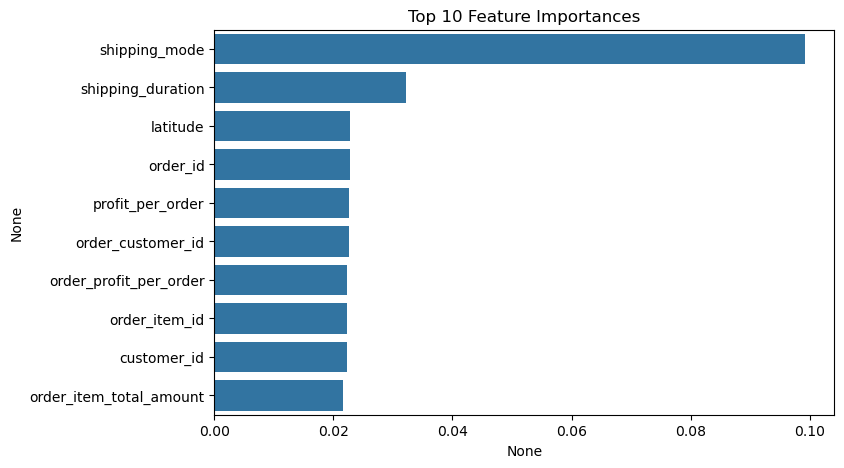

In [74]:
# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.show()

Phase 5: Model Development

Split the dataset into training and testing sets.

In [93]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])  # Features
y = df['label']                 # Target

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(10340, 43) (2586, 43)
(10340,) (2586,)


Train and evaluate multiple classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost).

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from xgboost import XGBClassifier

In [79]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   -----------------

In [94]:
# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

In [95]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

In [96]:
# Preprocessing for categorical & numerical
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

In [97]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

In [98]:
# Split before fitting models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [99]:
for name, model in models.items():
    # Create a pipeline to preprocess and train
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

In [103]:
# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Store results
results[name] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Report": classification_report(y_test, y_pred, digits=3)
}

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:38:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [104]:
# Display results
for name, metrics in results.items():
    print(f"\n{name}")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(metrics['Report'])


XGBoost
Accuracy: 0.597
              precision    recall  f1-score   support

           0      0.433     0.613     0.507       592
           1      0.377     0.080     0.132       501
           2      0.695     0.764     0.728      1493

    accuracy                          0.597      2586
   macro avg      0.502     0.486     0.456      2586
weighted avg      0.573     0.597     0.562      2586



In [107]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

print(X_train.dtypes)




payment_type                              int64
profit_per_order                        float64
sales_per_customer                      float64
category_id                             float64
category_name                            object
customer_city                            object
customer_country                          int64
customer_id                             float64
customer_segment                          int64
customer_state                           object
customer_zipcode                        float64
department_id                           float64
department_name                          object
latitude                                float64
longitude                               float64
market                                    int64
order_city                               object
order_country                            object
order_customer_id                       float64
order_date                  datetime64[ns, UTC]
order_id                                

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['col1', 'col2']   # must include all string/categorical cols
numerical_features = ['col3', 'col4']     # numeric only

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [111]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing: OneHotEncode categoricals, pass numerical columns as is
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [112]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

--- Logistic Regression ---
Accuracy: 0.5831399845320959
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.00      0.00      0.00       501
           2       0.58      1.00      0.74      1508

    accuracy                           0.58      2586
   macro avg       0.19      0.33      0.25      2586
weighted avg       0.34      0.58      0.43      2586

--- Random Forest ---
Accuracy: 0.5897138437741686
              precision    recall  f1-score   support

           0       0.43      0.23      0.30       577
           1       0.29      0.00      0.01       501
           2       0.61      0.92      0.74      1508

    accuracy                           0.59      2586
   macro avg       0.44      0.38      0.35      2586
weighted avg       0.51      0.59      0.50      2586

--- XGBoost ---
Accuracy: 0.591260634184068
              precision    recall  f1-score   support

           0       0.41      0.

Use hyperparameter tuning to optimize the best-performing model.

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [115]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing: OneHotEncode categorical columns, passthrough numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Base model
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Hyperparameter search space
param_dist = {
    'xgbclassifier__n_estimators': [50, 100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma': [0, 0.1, 0.3, 0.5],
    'xgbclassifier__min_child_weight': [1, 3, 5]
}

# Pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgbclassifier', xgb)
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:02:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__colsample_bytree': 1.0}
Best CV Accuracy: 0.6239845261121857

Test Accuracy: 0.6040216550657386
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.77      0.55       592
           1       0.53      0.05      0.09       501
           2       0.74      0.72      0.73      1493

    accuracy                           0.60      2586
   macro avg       0.56      0.52      0.46      2586
weighted avg       0.63      0.60      0.57      2586



In [116]:
# Extract trained XGB model from pipeline
best_xgb = best_model.named_steps['xgbclassifier']

# Get feature names after preprocessing
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([encoded_cat_cols, num_cols])

# Get feature importances
importances = best_xgb.feature_importances_

# Sort and select top N
indices = np.argsort(importances)[::-1]
top_n = 15
top_features = all_feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]

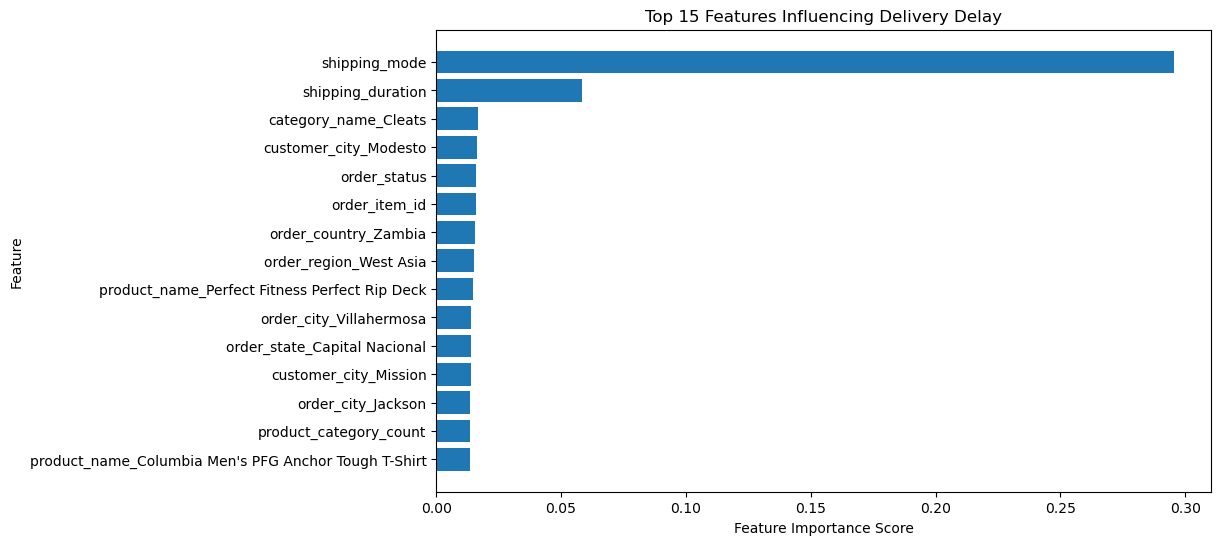

In [117]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 15 Features Influencing Delivery Delay")
plt.show()